# USA Health insurance price prediction
**source: Kaggle**

<img src="cert2.jpg" width=700 height=620 />

**Insurance is no exception.The Insurance sector is no stranger to data driven decision making. Yet AI and Big Data are revolutionizing the industry.** 

**In this project, we attempt to analyze and explore a dataset for medical costs in Health Insurance in USA in order to derive valuable insights, and find answers to questions through statistical hypothesis testing.**
Exploring the data before do any kind of ml task on it is a good practice. 

**Data Description**

Here the data contains the medical costs of people characterized by certain attributes.
**Attribute Information:**
-> age: Age of primary beneficiary

-> sex: Insurance contractor gender-> female / male

-> bmi: Body mass index, providing an understanding of body, weights that are relatively         high or low relative to height, objective index of body weight (kg / m ^ 2)             using the ratio of height to weight, ideally 18.5 to 24.9.

-> children: Number of children covered by health insurance / Number of dependents

-> smoker: Smoker / Non - smoker

-> region: The beneficiary's residential area in the US, northeast, southeast,                      southwest, northwest.

-> charges: ndividual medical costs billed by health insurance.1.12k

**Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

**Getting The Data**

In [106]:
data = pd.read_csv("USA health insurance.csv")

In [25]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Checking the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


So we have 1338 rows and 7 columns and our true label will be charges column and prediction also.


In [6]:
# Getting more info
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Getting related columns
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


**Data Analysis**

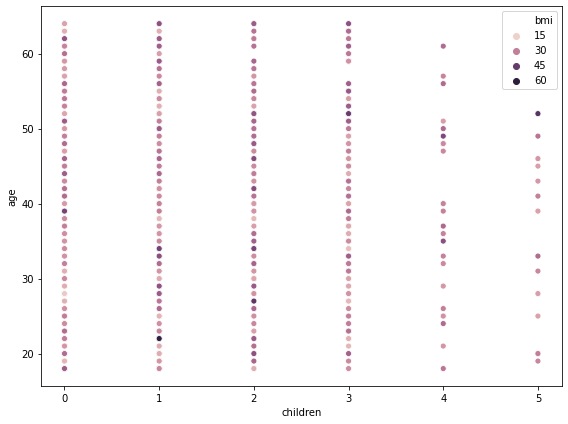

In [15]:
# Creating a scatter plot between children and their age
plt.figure(figsize=(8,6))
sns.scatterplot(x='children',y = 'age',data = data,hue = 'bmi')
plt.tight_layout()

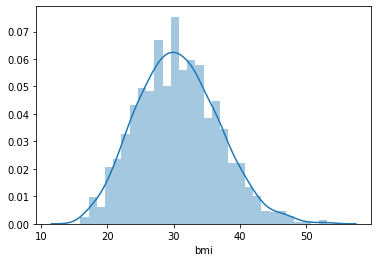

In [23]:
# Lets see the distribution of bmi column.
sns.distplot(data['bmi'],bins=30)

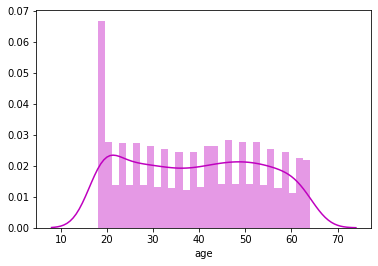

In [66]:
# distribution of age column
sns.distplot(data['age'],bins =30,color='m')

hex type
scatter type


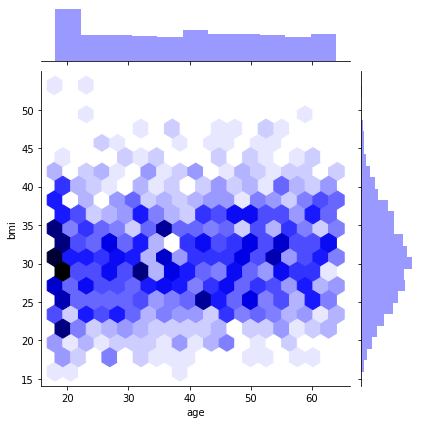

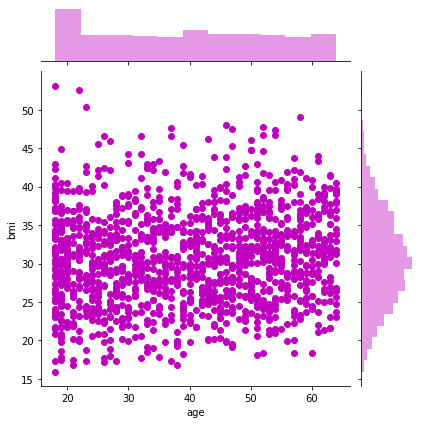

In [69]:
# Lets see the distribution of bmi and age column
print('hex type')
sns.jointplot(x= 'age',y= 'bmi',data = data,kind= 'hex',color='b')
print('scatter type')
sns.jointplot(x= 'age',y= 'bmi',data = data,color='m')


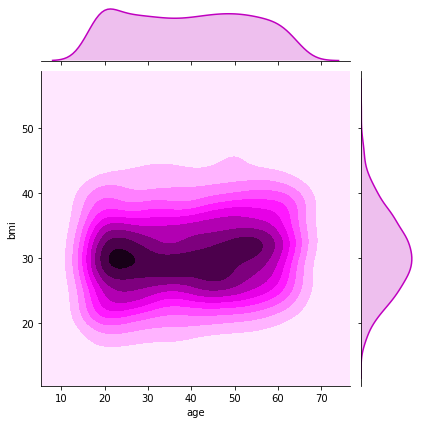

In [70]:
sns.jointplot(x= 'age',y= 'bmi',data = data,kind= 'kde',color='m')

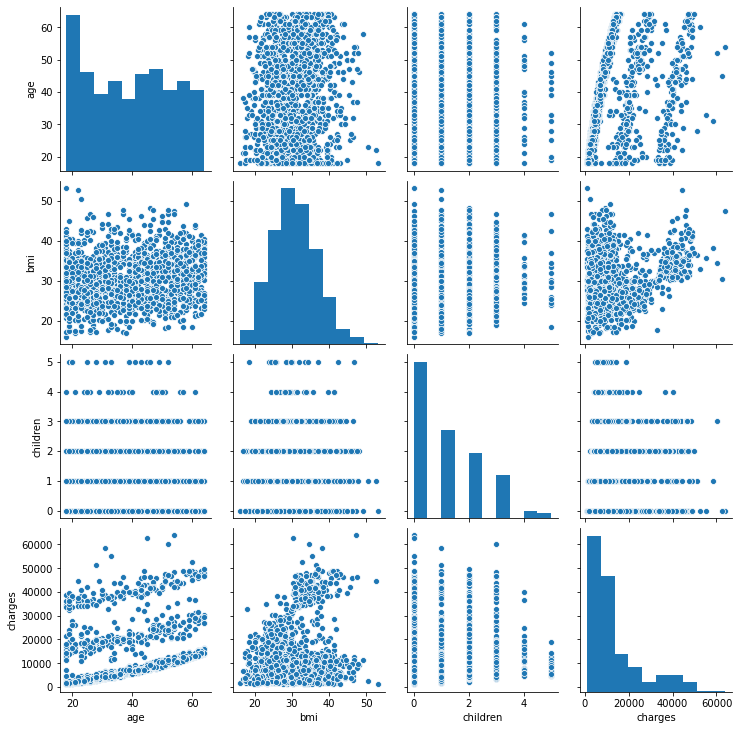

In [32]:
# Lets see a pairplot which will show us the  relationship pairwise of entire data set
sns.pairplot(data)

In [33]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

These are the regions we have here

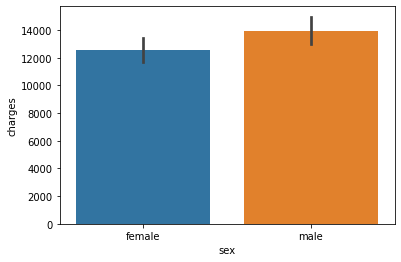

In [36]:
sns.barplot(x='sex',y='charges',data=data)

We can see male have to pay more than women

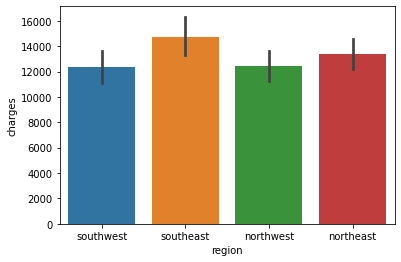

In [38]:
sns.barplot(x='region',y='charges',data=data)

We can see southeast region people have to pay more as compare to any other region.

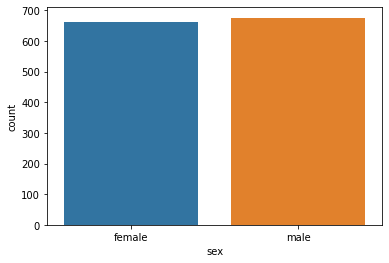

In [39]:
sns.countplot(x='sex',data=data)

As we can see we have more number of males here.

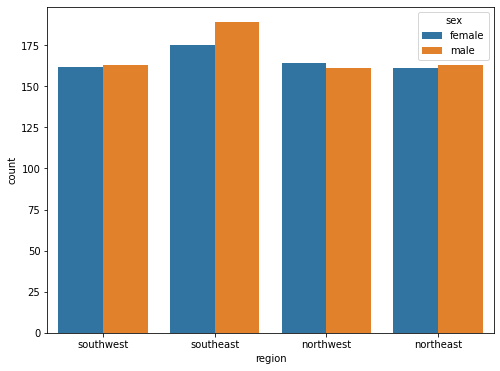

In [56]:
plt.figure(figsize=(8,6))
sns.countplot(x='region',data=data,hue='sex')

Here most of the people are from southeast and all other regions have probabilly same number of people in our dataset.

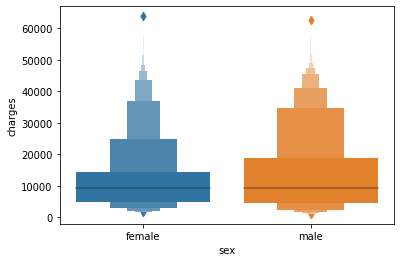

In [45]:
sns.boxenplot(x='sex',y= 'charges',data = data)
# It also shows us the distribution of our categorical data.

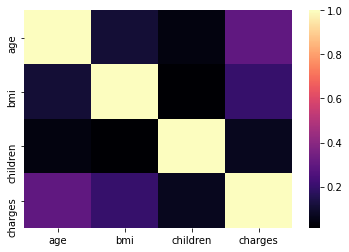

In [31]:
# Lets create a heatmap between correletion of data in our dataset
sns.heatmap(data.corr(),cmap='magma')

In [37]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Distribution of charges for smokers

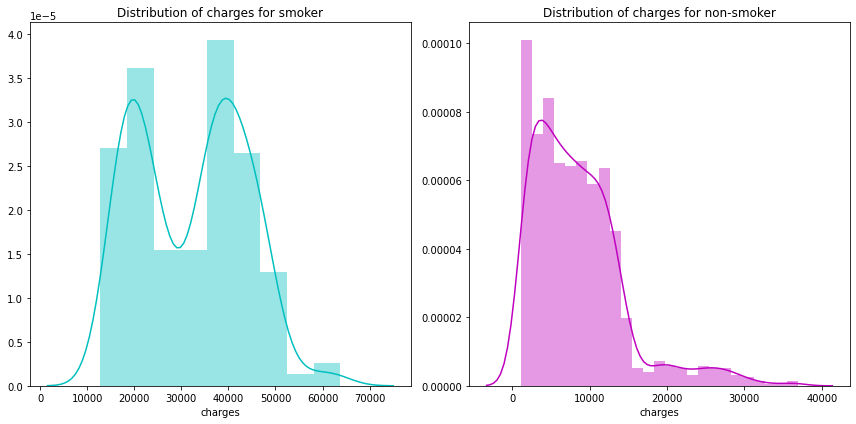

In [53]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121)  # 1 for row and 2 for column and 1 for 1st plot
sns.distplot(data[(data.smoker == 'yes')]['charges'],color='c',ax=ax1)
ax1.set_title("Distribution of charges for smoker")

ax2 = fig.add_subplot(122)
sns.distplot(data[(data.smoker == 'no')]['charges'], color='m',ax=ax2)
ax2.set_title("Distribution of charges for non-smoker")

plt.tight_layout()  # to avoid any overlap.

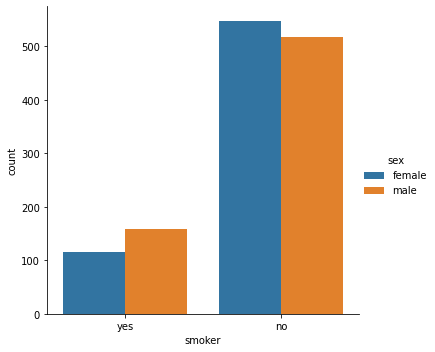

In [40]:
sns.catplot(x='smoker',kind='count', hue = 'sex',data = data)

Here we can see smoker are mostly man.

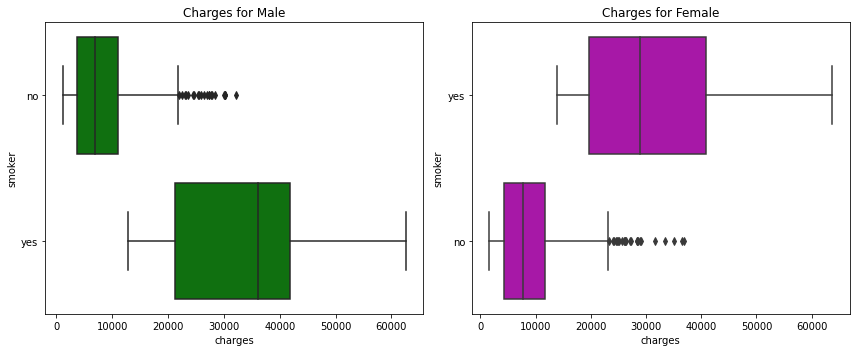

In [59]:
# Boxplot for charges for man and woman

fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(1,2,1)
sns.boxplot(x="charges",y= "smoker", data = data[(data.sex == 'male')],orient = "h",ax = ax,color='g')
ax.set_title("Charges for Male")

ax = fig.add_subplot(1,2,2)
sns.boxplot(x= "charges",y="smoker",data= data[(data.sex == 'female')],orient = 'h',ax = ax,color='m')
ax.set_title("Charges for Female")

plt.tight_layout()

/home/google/drag/lib/python3.6/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


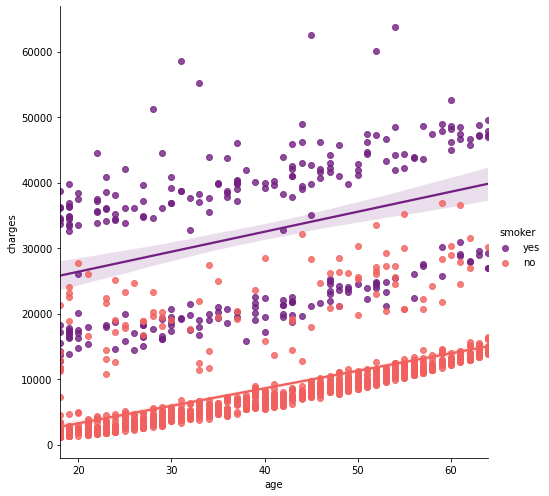

In [73]:
# lmplot
sns.lmplot(x='age',y = 'charges',hue = 'smoker',data = data,palette='magma',size=7)

Here we can see in nonsmoker the treatment cost increases with age.

/home/google/drag/lib/python3.6/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


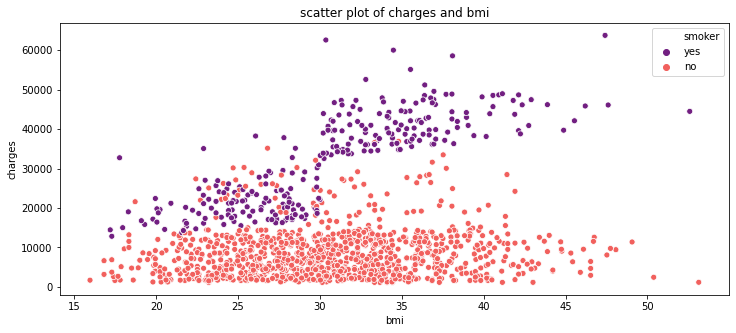

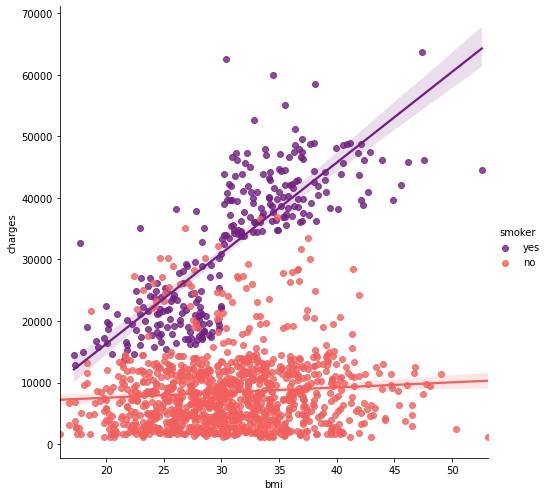

In [74]:
plt.figure(figsize=(12,5))
ax = sns.scatterplot(x = 'bmi',y = 'charges',hue = 'smoker',data = data,palette='magma')
ax.set_title('scatter plot of charges and bmi')

sns.lmplot(x = 'bmi', y = 'charges', hue = 'smoker', data = data,palette='magma',size=7)

**Regression Task**

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [107]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [108]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Here we are not going to include our region column

In [109]:
# converting sex column into numeric data
gender = pd.get_dummies(data['sex'],drop_first=True)
region2 = pd.get_dummies(data['region'],drop_first=True)
smoker2 = pd.get_dummies(data['smoker'],drop_first=True)

Here gender and region2 are 2 dataframe and we need to concatinate them with our orignal
dataset as coumns by replacing categorical columns(sex,region).

In [110]:
data = pd.concat([data,gender,region2,smoker2],axis=1)

In [111]:
# Lets have a look on our new dataframe
data.head()

,age,sex,bmi,children,smoker,region,charges,male,northwest,southeast,southwest,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,1,0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,1,0,0,0


In [112]:
'''We need to getread of sex and region and smoker column'''
data.drop(['sex','region','smoker'],axis= 1,inplace=True)

In [113]:
data.head()

,age,bmi,children,charges,male,northwest,southeast,southwest,yes
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0


In [114]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'male', 'northwest', 'southeast',
       'southwest', 'yes'],
      dtype='object')

In [115]:
X = data.drop(['charges'],axis=1)
Y = data['charges']

In [116]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 101)

In [117]:
X_train.shape

(936, 8)

In [118]:
X_test.shape

(402, 8)

In [119]:
model = LinearRegression()

In [120]:
model.fit(X_train,Y_train)

LinearRegression()

In [141]:
pred = model.predict(X_test)

In [142]:
print(model.score(X_test,Y_test))

0.7602196966782769


Score is not so good  so don't mad at me ok.

## There is an another way to do this using PloynomialFeatures

In [130]:
X = data.drop(['charges'],axis = 1)
Y = data['charges']

In [123]:
from sklearn.preprocessing import PolynomialFeatures
'''Generate a new feature matrix consisting of all polynomial combinations of the 
features with degree less than or equal to the specified degree. For example, if 
an input sample is two dimensional and of the form [a, b], the degree-2 polynomial 
features are [1, a, b, a^2, ab, b^2].'''

'Generate a new feature matrix consisting of all polynomial combinations of the \nfeatures with degree less than or equal to the specified degree. For example, if \nan input sample is two dimensional and of the form [a, b], the degree-2 polynomial \nfeatures are [1, a, b, a^2, ab, b^2].'

In [124]:
obj = PolynomialFeatures(degree=2)
input_X = obj.fit_transform(X)

In [125]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 101)

In [126]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [127]:
pred= lm.predict(X_test)

In [128]:
print(lm.score(X_test,Y_test))

0.7602196966782769


## Perdiction Time

In [143]:
pred.shape

(402,)

In [131]:
# Coefficient and intercept
print(model.coef_)

[  241.27878731   367.1887526    494.29061749    52.13546398
   169.8262773   -592.94498654  -880.64808742 23463.56486895]


In [132]:
# Our intercept
print(model.intercept_)

-12559.921371513936


In [133]:
coff_data = pd.DataFrame(model.coef_,X.columns,columns=['coff'])
# Here we take columns as index and  coff as values

In [134]:
coff_data.head()

,coff
age,241.278787
bmi,367.188753
children,494.290617
male,52.135464
northwest,169.826277


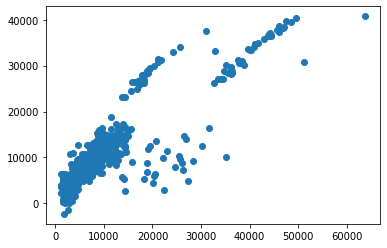

In [135]:
# Creating a scatter plot of test data and predictions
plt.scatter(Y_test,pred)

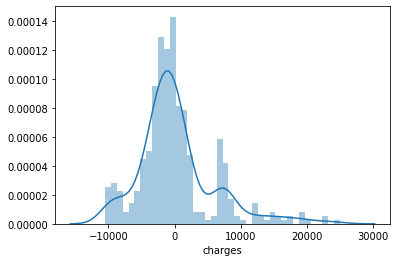

In [136]:
sns.distplot((Y_test-pred),bins = 40)
# Y_test-pred is our  resudual

Not a prety good job

In [137]:
# Evaluation
from sklearn import metrics

In [138]:
metrics.mean_squared_error(Y_test,pred)

33683659.32465649

In [139]:
np.sqrt(metrics.mean_squared_error(Y_test,pred))

5803.762514494928

In [140]:
metrics.mean_absolute_error(Y_test,pred)

3987.962847697633

## That's it 